In [64]:
import pickle
import time
import datetime
import random
import cv2
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# # Loading MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

100%|██████████| 60000/60000 [00:08<00:00, 6759.04it/s]


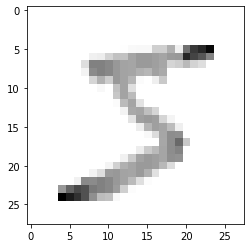

In [65]:
# x = X_train[1]
# x = tf.image.flip_up_down(x)
X_train = np.resize(X_train, (60000*2, 28, 28, 1))
y_train = np.resize(y_train, (60000*2))
plt.imshow(X_train[60000], cmap=plt.cm.binary)
X_train.shape
for i in tqdm(range (60000)):
    X_train[60000+i] = tf.image.flip_up_down(X_train[60000+i])

In [66]:
y_test.shape

(10000,)

In [67]:
model = tf.keras.models.Sequential()
# Input Layer

# model.add(layers.Dense(128, activation=tf.nn.relu))
# model.add(Conv2D(1, 3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(64, activation=tf.nn.relu))
model.add(layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [68]:

NAME = "randomFlip, suffice"+ str(time.time())
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
# cd "C:\Users\Admin\Desktop\HTML\NEURAL NETWORK"
# tensorboard --logdir="logs/"
# 
model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_test, y_test), callbacks=[tensorboard])
model.summary()


Epoch 1/10
1875/1875 [==============================] - 21s 4ms/step - loss: 0.6078 - accuracy: 0.8269 - val_loss: 0.2075 - val_accuracy: 0.9379
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1718 - accuracy: 0.9477 - val_loss: 0.1568 - val_accuracy: 0.9523
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1218 - accuracy: 0.9625 - val_loss: 0.1297 - val_accuracy: 0.9594
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0939 - accuracy: 0.9704 - val_loss: 0.1394 - val_accuracy: 0.9581
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0751 - accuracy: 0.9763 - val_loss: 0.1323 - val_accuracy: 0.9600
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0630 - accuracy: 0.9795 - val_loss: 0.1256 - val_accuracy: 0.9629
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0515 - accuracy: 0.9839 - val_loss: 0.1244 - val_accuracy